# **A/B Testing Conversion Analysis (Portfolio Project 2)**


# **Опис етапів проєкту**

**Етап 1. Статистичний розрахунок**
- Використано Python для обчислення:
  - Конверсій у контрольній та експериментальній групах
  - Відсоткових змін
  - Z-статистики та p-value
- Визначено статистичну значущість для кожної метрики

**Етап 2. Візуалізація**
- Побудовано дашборд у Tableau
- Додано фільтр за номером тесту
- Виведено пояснення логіки статистичної значущості


## 🔗 Посилання

- 📂 [CSV-файл з результатами](https://drive.google.com/file/d/1Yfpja9AdqVcVyTBP8hME71bmqCKtJien/view?usp=sharing)
- 📊 [Tableau Dashboard](https://public.tableau.com/app/profile/yuliia.smulchenko/viz/A_BTestResults_ConversionSignificanceDashboard/Dashboard1)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Завантаження даних (як у твоєму файлі)
data = [
    {'test_number': 2, 'metric': 'add_payment', 'numerator_ev': 2409, 'denominator_ev': 50244,
     'numerator_cc': 2344, 'denominator_cc': 50637},
    {'test_number': 2, 'metric': 'add_shipping', 'numerator_ev': 3510, 'denominator_ev': 50244,
     'numerator_cc': 3480, 'denominator_cc': 50637},
    {'test_number': 2, 'metric': 'begin_checkout', 'numerator_ev': 4313, 'denominator_ev': 50244,
     'numerator_cc': 4262, 'denominator_cc': 50637},
    {'test_number': 2, 'metric': 'new_accounts', 'numerator_ev': 4184, 'denominator_ev': 50244,
     'numerator_cc': 4165, 'denominator_cc': 50637},
    {'test_number': 1, 'metric': 'add_payment', 'numerator_ev': 2229, 'denominator_ev': 45193,
     'numerator_cc': 1988, 'denominator_cc': 45362},
]

# Перетворюємо в датафрейм
df = pd.DataFrame(data)

# Функція розрахунку статистики
def calculate_stats(row):
    p1 = row['numerator_ev'] / row['denominator_ev']
    p2 = row['numerator_cc'] / row['denominator_cc']
    p_pool = (row['numerator_ev'] + row['numerator_cc']) / (row['denominator_ev'] + row['denominator_cc'])
    se = np.sqrt(p_pool * (1 - p_pool) * (1 / row['denominator_ev'] + 1 / row['denominator_cc']))
    z = (p1 - p2) / se
    p_val = 2 * (1 - norm.cdf(abs(z)))
    significant = p_val < 0.05
    return pd.Series({
        'conversion_rate_ev': p1,
        'conversion_rate_cc': p2,
        'metric_change': p1 / p2,
        'z_stat': z,
        'p_value': p_val,
        'significant': significant
    })

# Розрахунок для всіх рядків
results = df.apply(calculate_stats, axis=1)

# Об'єднуємо результати
final_df = pd.concat([df, results], axis=1)

# Виводимо
pd.set_option("display.float_format", "{:,.4f}".format)
final_df


,test_number,metric,numerator_ev,denominator_ev,numerator_cc,denominator_cc,conversion_rate_ev,conversion_rate_cc,metric_change,z_stat,p_value,significant
0,2,add_payment,2409,50244,2344,50637,0.0479,0.0463,1.0358,1.2410,0.2146,False
1,2,add_shipping,3510,50244,3480,50637,0.0699,0.0687,1.0165,0.7096,0.4780,False
2,2,begin_checkout,4313,50244,4262,50637,0.0858,0.0842,1.0199,0.9529,0.3406,False
3,2,new_accounts,4184,50244,4165,50637,0.0833,0.0823,1.0124,0.5888,0.5560,False
4,1,add_payment,2229,45193,1988,45362,0.0493,0.0438,1.1254,3.9249,0.0001,True


In [ ]:
df_final.to_csv("ab_test_results_final.csv", index=False, sep=';')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_final.to_csv('/content/drive/MyDrive/ab_test_results_final.csv', index=False)


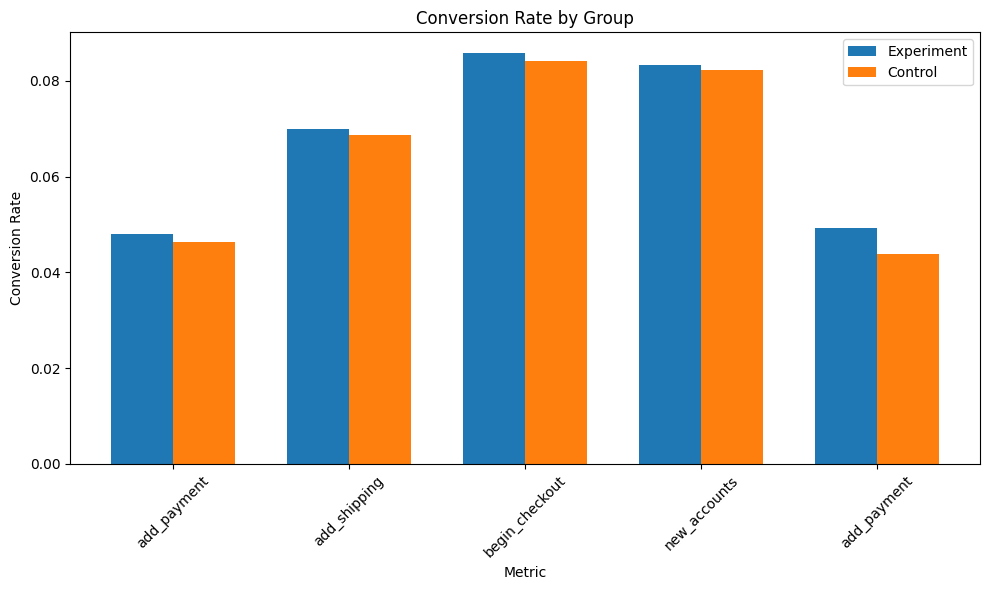

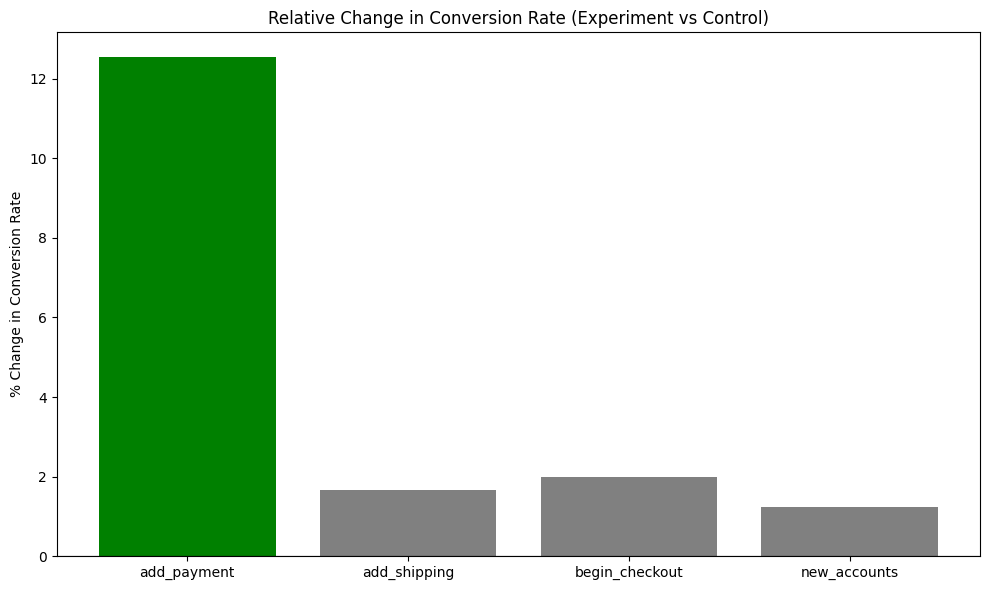


Висновки:
Метрика 'add_payment' у тесті 2 зросла на 3.58% — не є статистично значущим (p-value = 0.2146)
Метрика 'add_shipping' у тесті 2 зросла на 1.65% — не є статистично значущим (p-value = 0.4780)
Метрика 'begin_checkout' у тесті 2 зросла на 1.99% — не є статистично значущим (p-value = 0.3406)
Метрика 'new_accounts' у тесті 2 зросла на 1.24% — не є статистично значущим (p-value = 0.5560)
Метрика 'add_payment' у тесті 1 зросла на 12.54% — статистично значуще (p-value = 0.0001)


In [ ]:
# Portfolio Project 2: A/B Test Analysis with Visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. ДАНІ
raw_data = [
    {'test_number': 2, 'metric': 'add_payment', 'numerator_ev': 2409, 'denominator_ev': 50244, 'numerator_cc': 2344, 'denominator_cc': 50637},
    {'test_number': 2, 'metric': 'add_shipping', 'numerator_ev': 3510, 'denominator_ev': 50244, 'numerator_cc': 3480, 'denominator_cc': 50637},
    {'test_number': 2, 'metric': 'begin_checkout', 'numerator_ev': 4313, 'denominator_ev': 50244, 'numerator_cc': 4262, 'denominator_cc': 50637},
    {'test_number': 2, 'metric': 'new_accounts', 'numerator_ev': 4184, 'denominator_ev': 50244, 'numerator_cc': 4165, 'denominator_cc': 50637},
    {'test_number': 1, 'metric': 'add_payment', 'numerator_ev': 2229, 'denominator_ev': 45193, 'numerator_cc': 1988, 'denominator_cc': 45362},
]

df = pd.DataFrame(raw_data)

# 2. РОЗРАХУНОК МЕТРИК

def calculate_ab_metrics(row):
    p1 = row['numerator_ev'] / row['denominator_ev']
    p2 = row['numerator_cc'] / row['denominator_cc']
    p_pool = (row['numerator_ev'] + row['numerator_cc']) / (row['denominator_ev'] + row['denominator_cc'])
    se = np.sqrt(p_pool * (1 - p_pool) * (1/row['denominator_ev'] + 1/row['denominator_cc']))
    z = (p1 - p2) / se
    p_val = 2 * (1 - norm.cdf(abs(z)))
    return pd.Series({
        'conversion_rate_ev': p1,
        'conversion_rate_cc': p2,
        'metric_change': (p1 / p2) - 1,
        'z_stat': z,
        'p_value': p_val,
        'significant': p_val < 0.05
    })

results = df.apply(calculate_ab_metrics, axis=1)
df_final = pd.concat([df, results], axis=1)

# 3. ВІЗУАЛІЗАЦІЇ
# Bar chart: Конверсії
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df_final))
plt.bar(index, df_final['conversion_rate_ev'], bar_width, label='Experiment')
plt.bar(index + bar_width, df_final['conversion_rate_cc'], bar_width, label='Control')
plt.xlabel('Metric')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Group')
plt.xticks(index + bar_width / 2, df_final['metric'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Bar chart: Зміна в %
plt.figure(figsize=(10, 6))
colors = df_final['significant'].map({True: 'green', False: 'grey'})
plt.bar(df_final['metric'], df_final['metric_change'] * 100, color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('% Change in Conversion Rate')
plt.title('Relative Change in Conversion Rate (Experiment vs Control)')
plt.tight_layout()
plt.show()

# 4. ВИСНОВКИ
print("\n\033[1mВисновки:\033[0m")
for index, row in df_final.iterrows():
    effect = "зросла" if row['metric_change'] > 0 else "зменшилась"
    significance = "статистично значуще" if row['significant'] else "не є статистично значущим"
    print(f"Метрика '{row['metric']}' у тесті {int(row['test_number'])} {effect} на {row['metric_change'] * 100:.2f}% — {significance} (p-value = {row['p_value']:.4f})")

# 5. ЕКСПОРТ
# df_final.to_csv("ab_test_results_final.csv", index=False)  # <- розкоментуй, щоб зберегти


# **Висновки за результатами A/B тестів.**

# **Загальний висновок:**

За результатами проведених A/B тестів, лише один експеримент (з метрикою add_payment_info у Тесті №1) продемонстрував статистично значуще зростання конверсії. Інші протестовані зміни показали позитивну динаміку, проте ці результати не є статистично значущими і можуть бути наслідком випадкових коливань.

Детальні висновки за кожним тестом:

**- Тест №1**

Метрика: add_payment_info
Результат: Зростання конверсії на 12.54% в експериментальній групі порівняно з контрольною.
Статистична значущість: Так (p-value = 0.0001).
Висновок: Зміни, внесені в експериментальній групі, позитивно вплинули на конверсію метрики add_payment_info, і цей результат є статистично значущим.
Рекомендація: Зміни, протестовані у Тесті №1, можна впроваджувати.

 **- Тест №2**

Метрики: add_payment_info, add_shipping_info, begin_checkout, new_accounts
Результат: Невелике зростання конверсії в експериментальній групі (від +1.2% до +3.5%).
Статистична значущість: Ні (усі p-value > 0.2).
Висновок: Незважаючи на позитивну динаміку, жодна зі змін у Тесті №2 не показала статистично значущого впливу на конверсію. Спостережуване зростання може бути випадковим.
Рекомендація: Результати не дають достатніх підстав для впровадження змін. Рекомендується провести додаткове тестування або збільшити розмір вибірки для отримання більш надійних результатів.
Узагальнення рекомендацій:

Впровадити зміни, протестовані в Тесті №1, оскільки вони призвели до статистично значущого зростання конверсії метрики add_payment_info.
Щодо змін, протестованих у Тесті №2, необхідно провести додаткове тестування з більшою вибіркою або переглянути гіпотези та внести інші зміни для повторного тестування. Поточні результати не є достатньо переконливими для прийняття рішення про впровадження.